# Import Pandas

In [1]:
import pandas as pd

# Import Data Set

In [2]:
#data set is from Healthdata.gov and contains COVID-19 data from May 2023
covid = pd.read_csv('/Users/riley/Downloads/COVID-19_Community_Profile_Report_-_County-Level.csv', parse_dates = ["date"])
covid.head()
covid

,fips,county,state,fema_region,date,cases_last_7_days,cases_per_100k_last_7_days,total_cases,cases_pct_change_from_prev_week,deaths_last_7_days,...,pct_icu_beds_used_avg_last_7_days,pct_icu_beds_used_abs_change_from_prev_week,pct_icu_beds_used_covid_avg_last_7_days,pct_icu_beds_used_covid_abs_change_from_prev_week,pct_vents_used_avg_last_7_days,pct_vents_used_abs_change_from_prev_week,pct_vents_used_covid_avg_last_7_days,pct_vents_used_covid_abs_change_from_prev_week,pct_fully_vacc_total_pop,pct_fully_vacc_65_and_older
0,1000,"Unallocated, AL",AL,4.0,2023-05-10,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,"Autauga County, AL",AL,4.0,2023-05-10,8.0,14.319,19913.0,-0.333,0.0,...,0.717,-0.150,0.013,-0.011,NaN,NaN,NaN,NaN,0.461,0.744
2,1003,"Baldwin County, AL",AL,4.0,2023-05-10,45.0,20.158,70521.0,-0.196,0.0,...,0.836,-0.016,0.007,-0.009,NaN,NaN,NaN,NaN,0.534,0.888
3,1005,"Barbour County, AL",AL,4.0,2023-05-10,3.0,12.153,7582.0,-0.250,0.0,...,0.750,-0.057,0.026,0.010,NaN,NaN,NaN,NaN,0.474,0.747
4,1007,"Bibb County, AL",AL,4.0,2023-05-10,4.0,17.862,8149.0,-0.556,0.0,...,0.850,0.010,0.009,-0.003,NaN,NaN,NaN,NaN,0.365,0.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,72999,"Unallocated, PR",PR,2.0,2023-05-10,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3290,78000,"Unallocated, VI",VI,2.0,2023-05-10,58.0,NaN,24994.0,2.412,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,78010,"St. Croix Island, VI",VI,2.0,2023-05-10,0.0,NaN,NaN,NaN,0.0,...,0.476,-0.044,0.095,0.054,NaN,NaN,NaN,NaN,NaN,NaN
3292,78020,"St. John Island, VI",VI,2.0,2023-05-10,0.0,NaN,NaN,NaN,0.0,...,0.476,-0.044,0.095,0.054,NaN,NaN,NaN,NaN,NaN,NaN


# Check Data Types

In [3]:
#Confirming that all data types are correct
covid.dtypes

fips                                                                    int64
county                                                                 object
state                                                                  object
fema_region                                                           float64
date                                                           datetime64[ns]
cases_last_7_days                                                     float64
cases_per_100k_last_7_days                                            float64
total_cases                                                           float64
cases_pct_change_from_prev_week                                       float64
deaths_last_7_days                                                    float64
deaths_per_100k_last_7_days                                           float64
total_deaths                                                          float64
deaths_pct_change_from_prev_week                                

# Checking Columns for Null Values

In [4]:
## What percentage of each column is not null?
for column in covid.columns:
    non_null_percentage = (covid[column].notnull().mean() * 100)
    if non_null_percentage < 50:
        print(f"{column} is SPARSE: {non_null_percentage}% populated.")
    else:
        print(f"{column} is dense: {non_null_percentage}% populated.")

fips is dense: 100.0% populated.
county is dense: 100.0% populated.
state is dense: 100.0% populated.
fema_region is dense: 99.90892531876139% populated.
date is dense: 100.0% populated.
cases_last_7_days is dense: 99.8482088646023% populated.
cases_per_100k_last_7_days is dense: 97.78384942319369% populated.
total_cases is dense: 99.51426836672739% populated.
cases_pct_change_from_prev_week is dense: 80.51001821493625% populated.
deaths_last_7_days is dense: 99.90892531876139% populated.
deaths_per_100k_last_7_days is dense: 97.78384942319369% populated.
total_deaths is dense: 99.51426836672739% populated.
deaths_pct_change_from_prev_week is SPARSE: 16.81845780206436% populated.
test_positivity_rate_last_7_days is dense: 89.40497874924105% populated.
total_positive_tests_last_7_days is dense: 91.83363691560413% populated.
total_tests_last_7_days is dense: 91.83363691560413% populated.
total_tests_per_100k_last_7_days is dense: 94.77838494231938% populated.
test_positivity_rate_pct_cha

# Deleting Sparse Columns

In [5]:
covid = covid.drop(["pct_vents_used_avg_last_7_days", "pct_vents_used_abs_change_from_prev_week", "pct_vents_used_covid_avg_last_7_days", "pct_vents_used_covid_abs_change_from_prev_week"], axis=1)

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 35 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   fips                                                         3294 non-null   int64         
 1   county                                                       3294 non-null   object        
 2   state                                                        3294 non-null   object        
 3   fema_region                                                  3291 non-null   float64       
 4   date                                                         3294 non-null   datetime64[ns]
 5   cases_last_7_days                                            3289 non-null   float64       
 6   cases_per_100k_last_7_days                                   3221 non-null   float64       
 7   total_cases    

In [7]:
#deaths_pct_change_from_prev_week and suspected_covid_hosp_per_100_beds_pct_change_from_prev_week are also very sparse
covid = covid.drop(["deaths_pct_change_from_prev_week", "suspected_covid_hosp_per_100_beds_pct_change_from_prev_week"], axis=1)

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   fips                                                         3294 non-null   int64         
 1   county                                                       3294 non-null   object        
 2   state                                                        3294 non-null   object        
 3   fema_region                                                  3291 non-null   float64       
 4   date                                                         3294 non-null   datetime64[ns]
 5   cases_last_7_days                                            3289 non-null   float64       
 6   cases_per_100k_last_7_days                                   3221 non-null   float64       
 7   total_cases    

# Dropping Duplicates

In [9]:
covid = covid.drop_duplicates()

In [10]:
#changing fema region to string to prepare for next step - will change back after
covid["fema_region"] = covid["fema_region"].astype(str)

In [11]:
float_cols = covid.select_dtypes(include=['float64']).columns
covid[float_cols] = covid[float_cols].fillna(0)

In [12]:
#changing fema region back to float
covid["fema_region"] = covid["fema_region"].astype(float)

# Exploratory Data Analysis

In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   fips                                                         3294 non-null   int64         
 1   county                                                       3294 non-null   object        
 2   state                                                        3294 non-null   object        
 3   fema_region                                                  3291 non-null   float64       
 4   date                                                         3294 non-null   datetime64[ns]
 5   cases_last_7_days                                            3294 non-null   float64       
 6   cases_per_100k_last_7_days                                   3294 non-null   float64       
 7   total_cases    

In [14]:
covid.describe()

,fips,fema_region,date,cases_last_7_days,cases_per_100k_last_7_days,total_cases,cases_pct_change_from_prev_week,deaths_last_7_days,deaths_per_100k_last_7_days,total_deaths,...,pct_inpatient_beds_used_avg_last_7_days,pct_inpatient_beds_used_abs_change_from_prev_week,pct_inpatient_beds_used_covid_avg_last_7_days,pct_inpatient_beds_used_covid_abs_change_from_prev_week,pct_icu_beds_used_avg_last_7_days,pct_icu_beds_used_abs_change_from_prev_week,pct_icu_beds_used_covid_avg_last_7_days,pct_icu_beds_used_covid_abs_change_from_prev_week,pct_fully_vacc_total_pop,pct_fully_vacc_65_and_older
count,3294.000000,3291.000000,3294,3294.000000,3294.000000,3.294000e+03,3294.000000,3294.000000,3294.000000,3294.000000,...,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
mean,31613.215240,5.399575,2023-05-10 00:00:00,22.142987,20.845754,3.179001e+04,-0.010037,0.591682,0.450018,344.829690,...,0.632971,0.002431,0.010211,-0.001335,0.598618,0.000887,0.013385,-0.000723,0.525575,0.789386
min,1000.000000,1.000000,2023-05-10 00:00:00,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-0.310000,0.000000,-0.125000,0.000000,-0.692000,0.000000,-0.308000,0.000000,0.000000
25%,19037.500000,4.000000,2023-05-10 00:00:00,0.000000,0.000000,3.134500e+03,-0.533000,0.000000,0.000000,41.000000,...,0.535000,-0.012000,0.005000,-0.003000,0.490000,-0.026000,0.000000,-0.005000,0.436000,0.730000
50%,30044.000000,5.000000,2023-05-10 00:00:00,4.000000,13.975500,8.001000e+03,0.000000,0.000000,0.000000,106.000000,...,0.672000,0.002000,0.009000,-0.001000,0.670000,0.000000,0.007000,0.000000,0.519000,0.827000
75%,46784.250000,7.000000,2023-05-10 00:00:00,14.000000,25.651000,2.095925e+04,0.061250,0.000000,0.000000,251.000000,...,0.771000,0.020000,0.014000,0.001000,0.796000,0.027000,0.017000,0.002000,0.614000,0.906000
max,78030.000000,10.000000,2023-05-10 00:00:00,2273.000000,611.829000,3.742471e+06,16.000000,116.000000,50.787000,36049.000000,...,1.030000,0.286000,0.089000,0.064000,1.012000,0.432000,0.400000,0.400000,0.950000,0.950000
std,16524.728085,2.100048,NaN,77.770044,31.531960,1.101548e+05,1.056386,4.179244,2.089665,1126.833565,...,0.196706,0.040108,0.008614,0.007681,0.268419,0.090250,0.026689,0.028393,0.159842,0.176511


## Focusing on North Carolina

In [15]:
covid[["county"]][covid["state"] == "NC"]

,county
1923,"Unallocated, NC"
1924,"Alamance County, NC"
1925,"Alexander County, NC"
1926,"Alleghany County, NC"
1927,"Anson County, NC"
...,...
2019,"Wayne County, NC"
2020,"Wilkes County, NC"
2021,"Wilson County, NC"
2022,"Yadkin County, NC"


In [16]:
#deleting Unallocated, NC
covid = covid[covid['county'] != "Unallocated, NC"]

In [17]:
covid[["county"]][covid["state"] == "NC"].nunique()

county    100
dtype: int64

In [18]:
NC = covid["state"] == "NC"
covid[NC].describe()

,fips,fema_region,date,cases_last_7_days,cases_per_100k_last_7_days,total_cases,cases_pct_change_from_prev_week,deaths_last_7_days,deaths_per_100k_last_7_days,total_deaths,...,pct_inpatient_beds_used_avg_last_7_days,pct_inpatient_beds_used_abs_change_from_prev_week,pct_inpatient_beds_used_covid_avg_last_7_days,pct_inpatient_beds_used_covid_abs_change_from_prev_week,pct_icu_beds_used_avg_last_7_days,pct_icu_beds_used_abs_change_from_prev_week,pct_icu_beds_used_covid_avg_last_7_days,pct_icu_beds_used_covid_abs_change_from_prev_week,pct_fully_vacc_total_pop,pct_fully_vacc_65_and_older
count,100.000000,100.0,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,37100.000000,4.0,2023-05-10 00:00:00,22.570000,20.633690,35014.040000,0.196000,0.730000,0.754870,290.590000,...,0.768770,0.014040,0.010510,-0.000410,0.743380,0.01451,0.010670,-0.001950,0.58799,0.886750
min,37001.000000,4.0,2023-05-10 00:00:00,0.000000,0.000000,1234.000000,-1.000000,0.000000,0.000000,10.000000,...,0.314000,-0.087000,0.000000,-0.062000,0.214000,-0.21900,0.000000,-0.071000,0.43400,0.659000
25%,37050.500000,4.0,2023-05-10 00:00:00,3.750000,10.444500,7535.750000,-0.412250,0.000000,0.000000,91.750000,...,0.739000,-0.008000,0.005000,-0.003000,0.663000,-0.01450,0.000000,-0.004000,0.51900,0.837750
50%,37100.000000,4.0,2023-05-10 00:00:00,10.500000,17.804500,18520.500000,-0.049500,0.000000,0.000000,173.000000,...,0.779000,0.007000,0.010500,-0.001000,0.789000,0.01600,0.007500,0.000000,0.58400,0.910500
75%,37149.500000,4.0,2023-05-10 00:00:00,28.750000,26.876000,37723.750000,0.366750,1.000000,1.018000,387.500000,...,0.855000,0.030250,0.016000,0.001000,0.873000,0.04200,0.019000,0.000000,0.63525,0.950000
max,37199.000000,4.0,2023-05-10 00:00:00,218.000000,71.721000,394227.000000,8.000000,8.000000,8.636000,1932.000000,...,0.913000,0.087000,0.026000,0.020000,0.919000,0.21900,0.080000,0.080000,0.92200,0.950000
std,58.022984,0.0,NaN,34.205338,14.696986,57911.532836,1.180794,1.229724,1.378454,317.190288,...,0.125101,0.033322,0.007723,0.008358,0.176837,0.07402,0.014175,0.017663,0.09130,0.070383


In [19]:
#Counties with the most total cases
covid[["county", "total_cases"]][NC].sort_values("total_cases", ascending=False).head(10)

,county,total_cases
2015,"Wake County, NC",394227.0
1983,"Mecklenburg County, NC",371088.0
1964,"Guilford County, NC",162354.0
1957,"Forsyth County, NC",126962.0
1949,"Cumberland County, NC",117076.0
1955,"Durham County, NC",104443.0
1959,"Gaston County, NC",82513.0
2013,"Union County, NC",80144.0
1974,"Johnston County, NC",76467.0
1936,"Cabarrus County, NC",72938.0


In [20]:
#Most Vaccinated Counties
covid[["county", "pct_fully_vacc_total_pop"]][NC].sort_values("pct_fully_vacc_total_pop", ascending=False).head(10)

,county,pct_fully_vacc_total_pop
1991,"Orange County, NC",0.922
1951,"Dare County, NC",0.838
2015,"Wake County, NC",0.829
1955,"Durham County, NC",0.813
1934,"Buncombe County, NC",0.757
1942,"Chatham County, NC",0.719
1933,"Brunswick County, NC",0.711
1939,"Carteret County, NC",0.710
1988,"New Hanover County, NC",0.705
1983,"Mecklenburg County, NC",0.703


In [21]:
#Least Vaccinated Counties
covid[["county", "pct_fully_vacc_total_pop"]][NC].sort_values("pct_fully_vacc_total_pop", ascending=True).head(10)

,county,pct_fully_vacc_total_pop
1970,"Hoke County, NC",0.434
2001,"Robeson County, NC",0.443
1985,"Montgomery County, NC",0.448
2004,"Rutherford County, NC",0.448
1966,"Harnett County, NC",0.451
2007,"Stanly County, NC",0.465
1998,"Polk County, NC",0.469
1947,"Columbus County, NC",0.469
1999,"Randolph County, NC",0.469
1954,"Duplin County, NC",0.475


In [22]:
#Counties with the most cases in the last week
covid[["county","fips", "cases_last_7_days"]] [NC].sort_values("cases_last_7_days", ascending=False).head(10)

,county,fips,cases_last_7_days
1983,"Mecklenburg County, NC",37119,218.0
2015,"Wake County, NC",37183,168.0
1957,"Forsyth County, NC",37067,138.0
1964,"Guilford County, NC",37081,117.0
1955,"Durham County, NC",37063,84.0
2013,"Union County, NC",37179,75.0
1934,"Buncombe County, NC",37021,58.0
1949,"Cumberland County, NC",37051,54.0
1974,"Johnston County, NC",37101,52.0
1936,"Cabarrus County, NC",37025,48.0


## Visualizations for NC

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

<Axes: title={'center': 'Top 10 Counties by Total Cases'}, xlabel='county'>

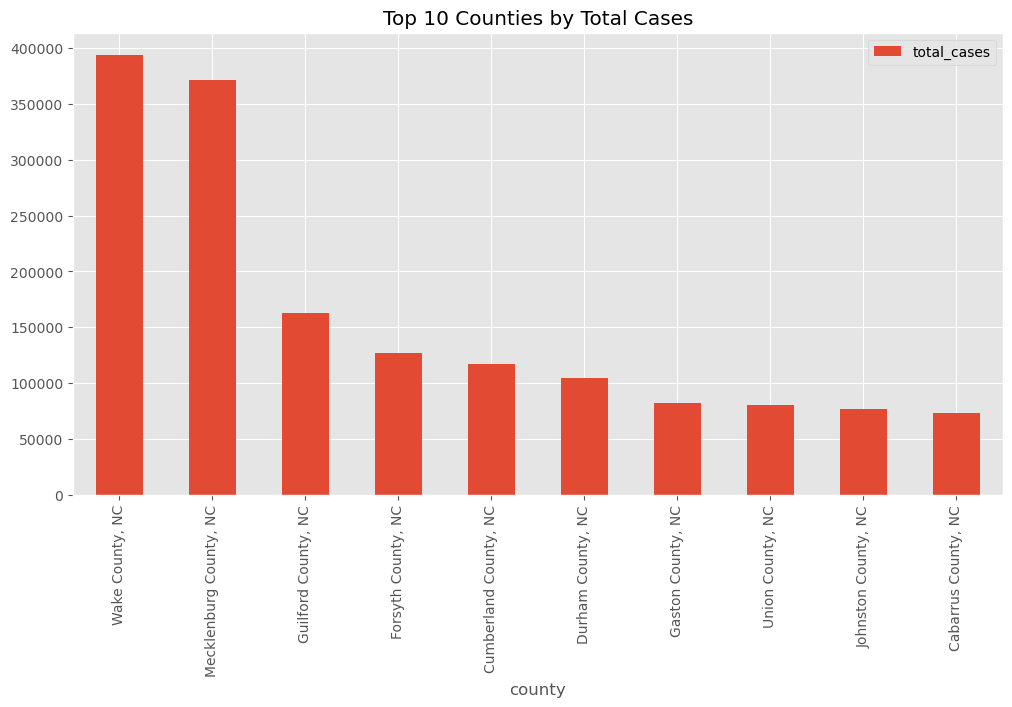

In [24]:
#Top 10 Counties by Total Cases
top10_cases = covid[["county", "total_cases"]][covid["state"] == "NC"].sort_values("total_cases", ascending=False).head(10)
top10_cases
top10_cases.plot.bar(x="county", y="total_cases", title = "Top 10 Counties by Total Cases", figsize = [12, 6])


<Axes: title={'center': 'Top 10 Counties by Total Deaths'}, xlabel='county'>

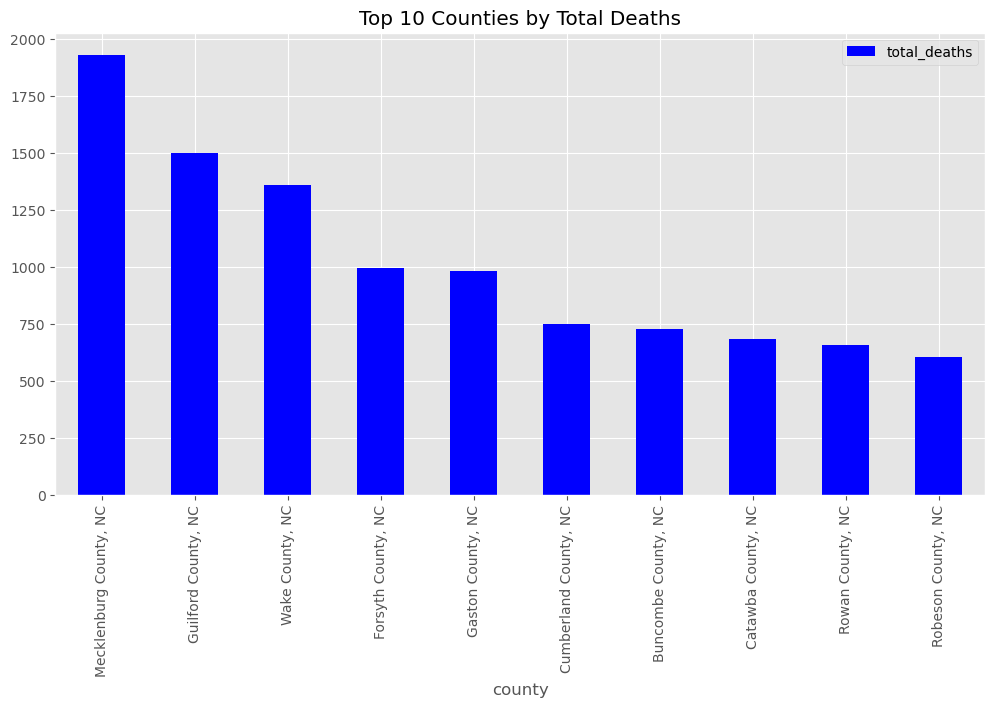

In [25]:
#Top 10 Counties by Total Deaths
top10_deaths = covid[["county", "total_deaths"]][covid["state"] == "NC"].sort_values("total_deaths", ascending=False).head(10)
top10_deaths
top10_deaths.plot.bar(x="county", y="total_deaths", title = "Top 10 Counties by Total Deaths", figsize = [12, 6], color = "Blue")


<Axes: title={'center': 'Top 10 Counties by Cases in the Last 7 Days'}, ylabel='county'>

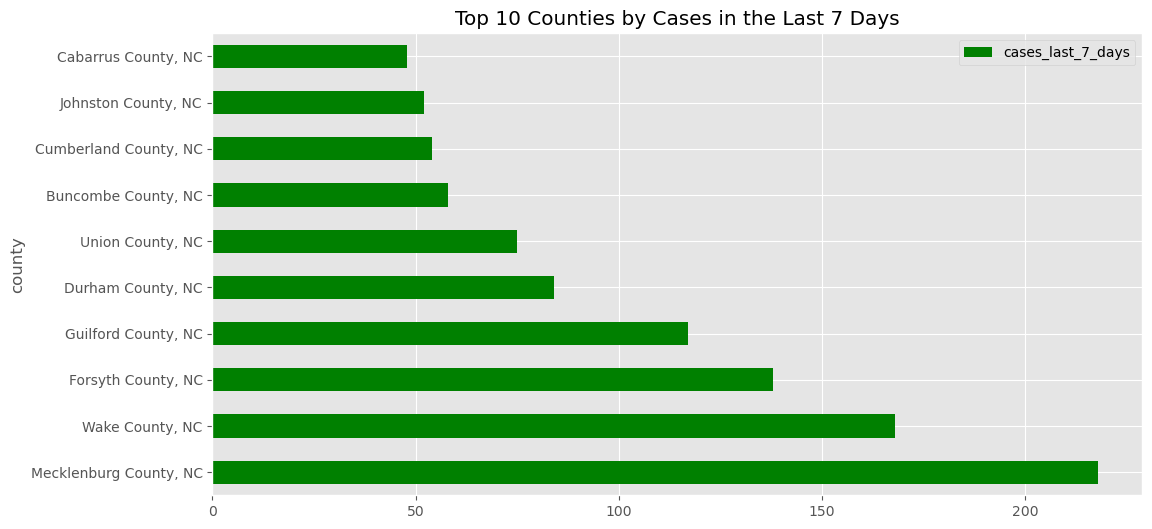

In [34]:
#Top 10 Counties by Most Cases in Last 7 Days
cases_last7 = covid[["county", "cases_last_7_days"]][covid["state"] == "NC"].sort_values("cases_last_7_days", ascending=False).head(10)
cases_last7
cases_last7.plot.barh(x="county", y="cases_last_7_days", title = "Top 10 Counties by Cases in the Last 7 Days", figsize = [12, 6], color = "Green")


<Axes: title={'center': 'Least Vaccinated Counties in NC'}, ylabel='county'>

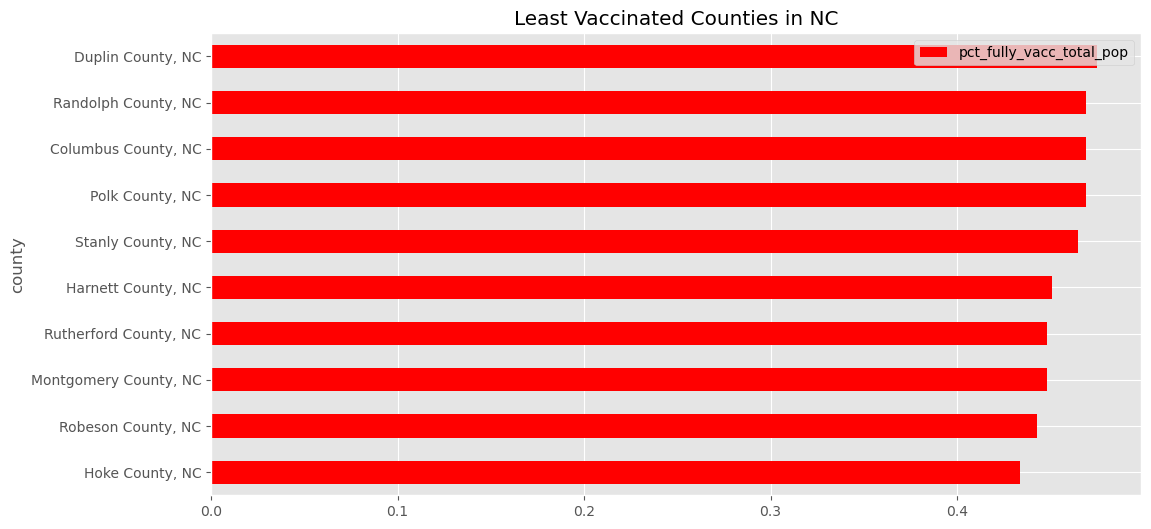

In [32]:
#Top 10 Least Vaccinated Counties
least_vaccinated = covid[NC].sort_values("pct_fully_vacc_total_pop", ascending=True).head(10)
least_vaccinated.plot.barh(x="county", y="pct_fully_vacc_total_pop", title = "Least Vaccinated Counties in NC", figsize = [12, 6], color = "Red")

<Axes: title={'center': 'Most Vaccinated Counties in NC'}, ylabel='county'>

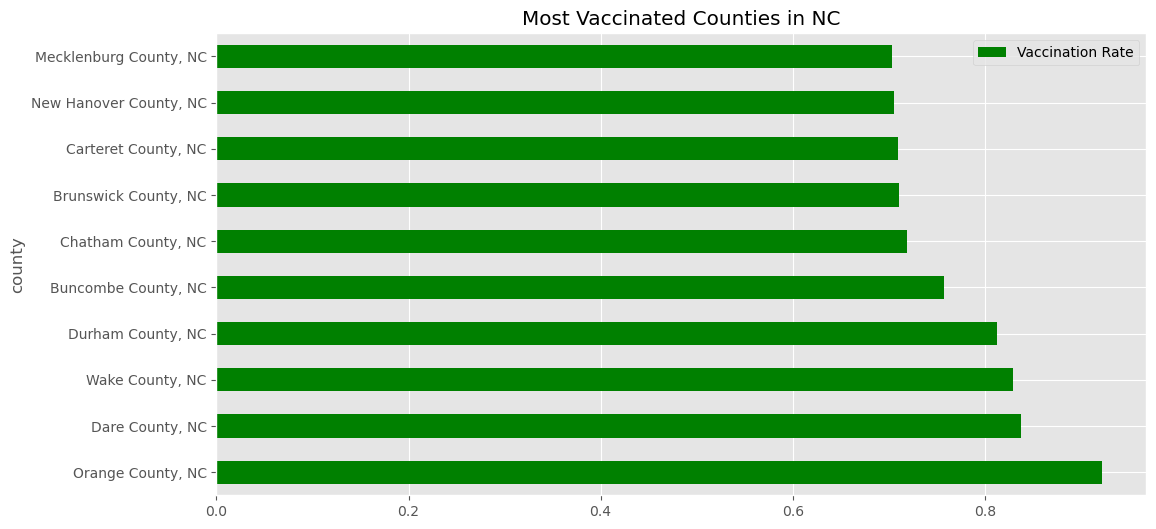

In [46]:
#Top 10 Least Vaccinated Counties
most_vaccinated = covid[NC].sort_values("pct_fully_vacc_total_pop", ascending=False).head(10)
most_vaccinated.plot.barh(x="county", y="pct_fully_vacc_total_pop", title = "Most Vaccinated Counties in NC", figsize = [12, 6], color = "Green", label = "Vaccination Rate")